# 1. Estudo de Caso ITUB4 (Cotação e Volume)

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
itub = yf.download("ITUB4.SA", start= '2017-01-01')

[*********************100%%**********************]  1 of 1 completed


In [16]:
itub.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,22.299999,22.493334,22.206667,22.353333,16.801758,3105150
2017-01-03,22.559999,23.313334,22.520000,23.299999,17.513308,25215000
2017-01-04,23.200001,23.486666,23.139999,23.400000,17.588488,13619250
2017-01-05,23.393333,23.986666,23.206667,23.719999,17.829014,21988800
2017-01-06,23.693333,23.913334,23.473333,23.799999,17.889139,14017650


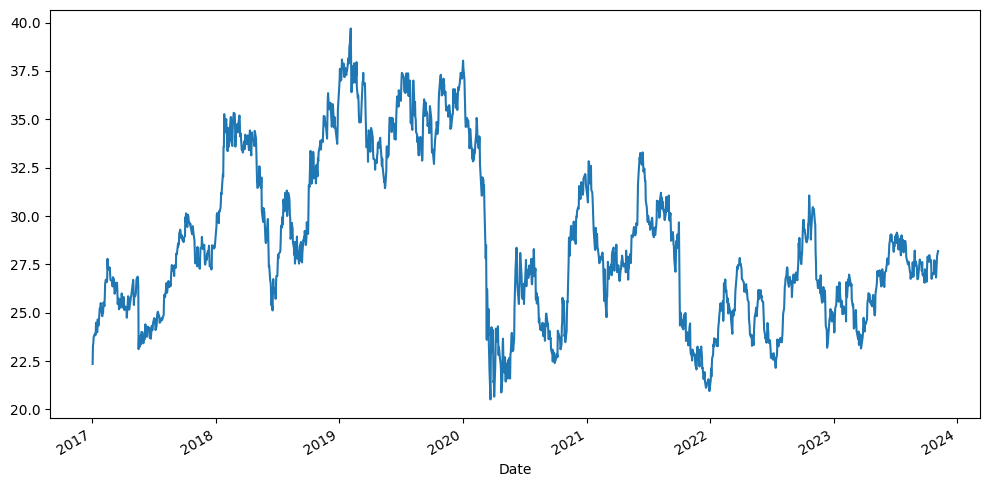

In [17]:
itub['Close'].plot(figsize = (12,6));

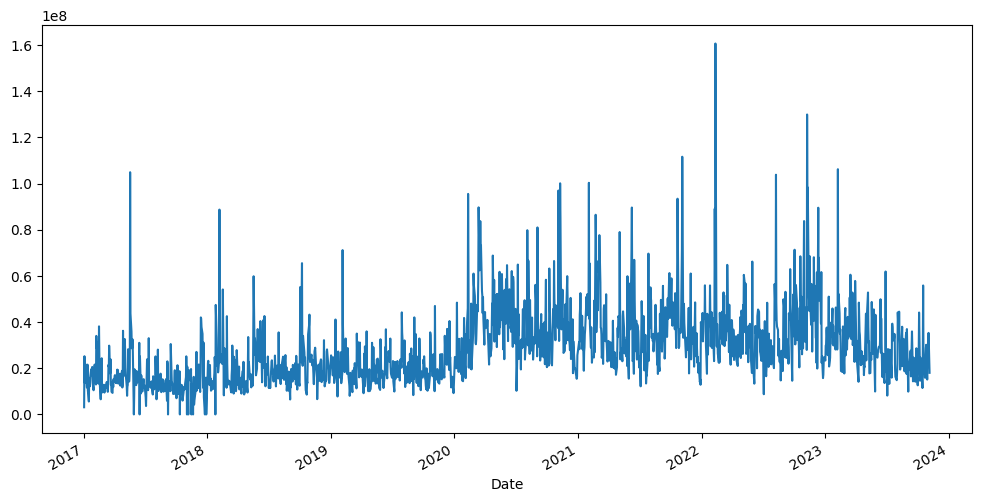

In [18]:
itub['Volume'].plot(figsize = (12,6));

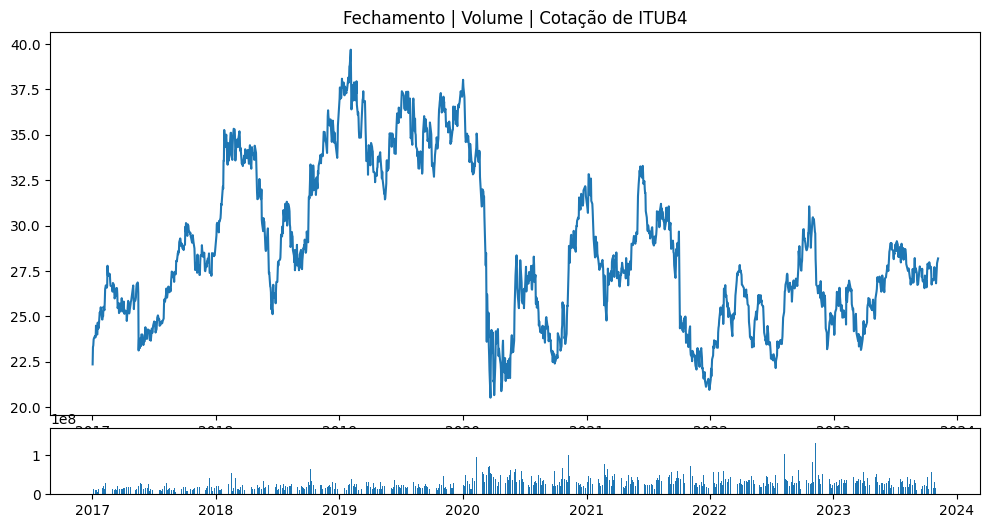

In [21]:
fig = plt.figure(figsize = (12,6))
gs = fig.add_gridspec(nrows = 6, ncols = 1)

ax1 = fig.add_subplot(gs[0:5, 0])
ax2 = fig.add_subplot(gs[5, 0])

ax1.plot(itub.Close);
ax2.bar(itub.index, itub.Volume);
ax1.set_title('Fechamento | Volume | Cotação de ITUB4');

# 2. Estudo de Caso (Matriz de Correlação)

## 2.1. Importar as bibliotecas e puxar os dados

In [1]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce

In [15]:
ativos = ['KNRI11.SA', 'ONEF11.SA', 'HGLG11.SA', 'HGBS11.SA', 'SMAL11.SA', 'IVVB11.SA', 'AAPL34.SA']

In [16]:
ativos = yf.download(ativos, start = '2019-01-01')['Adj Close']

[*********************100%%**********************]  7 of 7 completed


In [17]:
ativos.head()

,AAPL34.SA,HGBS11.SA,HGLG11.SA,IVVB11.SA,KNRI11.SA,ONEF11.SA,SMAL11.SA
Date,,,,,,,
2019-01-02,7.255325,206.791412,120.571121,100.519997,130.546707,133.912689,89.000000
2019-01-03,6.461456,207.052734,120.613930,97.989998,131.960434,133.912689,89.000000
2019-01-04,6.564743,206.861069,120.014915,99.699997,132.065811,133.750900,90.500000
2019-01-07,6.551532,207.749603,121.084579,101.150002,131.249268,129.418961,88.199997
2019-01-08,6.748498,209.056168,121.512398,101.199997,131.442398,125.832962,88.830002


In [18]:
cesta = ['USDBRL=X', 'EURBRL=X', '^BVSP','^GSPC', 'BTC-USD', 'ETH-USD']

In [19]:
cesta = yf.download(cesta, '2019-01-01')['Adj Close']

[*********************100%%**********************]  6 of 6 completed


In [26]:
cesta.rename(columns = {'USDBRL=X': 'Dolar',
                        'EURBRL=X': 'Euro',
                        '^BVSP': 'Ibov',
                        '^GSPC': 'S&P500',
                        'BTC-USD': 'Bitcoin',
                        'ETH-USD': 'Ethereum'}, inplace = True)

In [27]:
cesta.head()

,Bitcoin,Ethereum,Euro,Dolar,Ibov,S&P500
Date,,,,,,
2019-01-01,3843.520020,140.819412,4.4472,3.8800,NaN,NaN
2019-01-02,3943.409424,155.047684,4.4472,3.8799,91012.0,2510.030029
2019-01-03,3836.741211,149.135010,4.2853,3.7863,91564.0,2447.889893
2019-01-04,3857.717529,154.581940,4.2756,3.7551,91841.0,2531.939941
2019-01-05,3845.194580,155.638596,NaN,NaN,NaN,NaN


In [21]:
acoes = ['PETR4.SA', 'WEGE3.SA', 'MGLU3.SA', 'LREN3.SA', 'VALE3.SA', 'BPAC11.SA','OIBR3.SA']

In [22]:
acoes = yf.download(acoes, start = '2019-01-01')['Adj Close']

[*********************100%%**********************]  7 of 7 completed


In [23]:
acoes.head()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2019-01-02,5.540448,35.395332,5.641578,12.6,8.899590,35.196037,8.409082
2019-01-03,5.769631,34.948334,5.581216,14.1,9.117826,33.756233,8.600835
2019-01-04,5.974339,33.607273,5.411353,14.1,9.143719,35.953827,8.699050
2019-01-07,6.096719,32.835175,5.495375,14.2,9.287975,35.760941,8.563417
2019-01-08,5.983187,33.891743,5.451089,13.8,9.232491,36.105389,8.493267


## 2.2. Juntando tudo num dataframe só

In [28]:
# Criar uma variavel com os df

dfs = [ativos, cesta, acoes]

In [29]:
df_final = reduce(lambda left,right: pd.merge(left, right, how = 'inner', on = 'Date'), dfs)

In [31]:
df_final.head()

,AAPL34.SA,HGBS11.SA,HGLG11.SA,IVVB11.SA,KNRI11.SA,ONEF11.SA,SMAL11.SA,Bitcoin,Ethereum,Euro,Dolar,Ibov,S&P500,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,
2019-01-02,7.255325,206.791412,120.571121,100.519997,130.546707,133.912689,89.000000,3943.409424,155.047684,4.4472,3.8799,91012.0,2510.030029,5.540448,35.395332,5.641578,12.6,8.899590,35.196037,8.409082
2019-01-03,6.461456,207.052734,120.613930,97.989998,131.960434,133.912689,89.000000,3836.741211,149.135010,4.2853,3.7863,91564.0,2447.889893,5.769631,34.948334,5.581216,14.1,9.117826,33.756233,8.600835
2019-01-04,6.564743,206.861069,120.014915,99.699997,132.065811,133.750900,90.500000,3857.717529,154.581940,4.2756,3.7551,91841.0,2531.939941,5.974339,33.607273,5.411353,14.1,9.143719,35.953827,8.699050
2019-01-07,6.551532,207.749603,121.084579,101.150002,131.249268,129.418961,88.199997,4025.248291,151.699219,4.2300,3.6612,91699.0,2549.689941,6.096719,32.835175,5.495375,14.2,9.287975,35.760941,8.563417
2019-01-08,6.748498,209.056168,121.512398,101.199997,131.442398,125.832962,88.830002,4030.847900,150.359634,4.2841,3.7341,92032.0,2574.409912,5.983187,33.891743,5.451089,13.8,9.232491,36.105389,8.493267


## 2.3 Preparando a Matriz de Correlação

In [32]:
retornos = df_final.pct_change()

C:\Users\brubr\AppData\Local\Temp\ipykernel_11480\3130339597.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  retornos = df_final.pct_change()


In [34]:
retornos = retornos.dropna()
retornos

,AAPL34.SA,HGBS11.SA,HGLG11.SA,IVVB11.SA,KNRI11.SA,ONEF11.SA,SMAL11.SA,Bitcoin,Ethereum,Euro,Dolar,Ibov,S&P500,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,
2019-01-03,-0.109419,0.001264,0.000355,-0.025169,0.010829,0.000000,0.000000,-0.027050,-0.038135,-0.036405,-0.024124,0.006065,-0.024757,0.041365,-0.012629,-0.010699,0.119048,0.024522,-0.040908,0.022803
2019-01-04,0.015985,-0.000926,-0.004966,0.017451,0.000799,-0.001208,0.016854,0.005467,0.036523,-0.002264,-0.008240,0.003025,0.034336,0.035480,-0.038373,-0.030435,0.000000,0.002840,0.065102,0.011419
2019-01-07,-0.002012,0.004295,0.008913,0.014544,-0.006183,-0.032388,-0.025414,0.043427,-0.018648,-0.010665,-0.025006,-0.001546,0.007010,0.020484,-0.022974,0.015527,0.007092,0.015777,-0.005365,-0.015592
2019-01-08,0.030064,0.006289,0.003533,0.000494,0.001471,-0.027708,0.007143,0.001391,-0.008831,0.012790,0.019912,0.003631,0.009695,-0.018622,0.032178,-0.008059,-0.028169,-0.005974,0.009632,-0.008192
2019-01-09,0.007475,0.010417,0.009437,0.000593,-0.005879,0.010571,0.004165,0.001104,0.002949,-0.008006,-0.005811,0.017179,0.004098,0.001526,0.021583,-0.003339,0.014493,0.020833,0.024423,0.011013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-30,0.018298,0.005808,0.001141,0.017599,-0.002684,-0.003020,-0.013256,0.017475,0.016878,-0.004598,-0.006674,-0.006787,0.012010,-0.022487,-0.022113,-0.061644,-0.016393,-0.010158,0.009028,0.021182
2023-10-31,0.001867,0.000044,0.000443,0.004206,-0.000813,-0.006604,0.012359,0.004794,0.003519,0.021894,0.018996,0.005438,0.006475,0.001353,0.026801,-0.029197,-0.016667,-0.009692,0.012027,0.021981
2023-11-01,0.007221,0.000000,-0.002103,-0.002564,-0.006617,0.000700,0.017516,0.022196,0.016863,-0.004670,-0.002378,0.016872,0.010506,-0.002027,0.000816,0.000000,0.033898,0.010938,0.019130,0.002121


## 2.4. Matriz de Correlação

In [35]:
correlacao = retornos.corr()

In [36]:
correlacao

,AAPL34.SA,HGBS11.SA,HGLG11.SA,IVVB11.SA,KNRI11.SA,ONEF11.SA,SMAL11.SA,Bitcoin,Ethereum,Euro,Dolar,Ibov,S&P500,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
AAPL34.SA,1.000000,0.076033,0.080968,0.746916,0.051528,0.022301,0.118126,0.172876,0.202925,0.026237,0.023074,0.180828,0.591283,0.152888,0.053468,0.135555,0.002495,0.127932,0.229240,0.130590
HGBS11.SA,0.076033,1.000000,0.511117,0.123990,0.425002,0.320409,0.367519,0.111667,0.123950,-0.064016,-0.078889,0.341105,0.256915,0.260335,0.298876,0.255411,0.136984,0.258143,0.143666,0.208414
HGLG11.SA,0.080968,0.511117,1.000000,0.143490,0.459096,0.299961,0.344511,0.101501,0.092712,-0.007177,-0.014838,0.333880,0.250447,0.248223,0.253942,0.217860,0.137421,0.280746,0.165814,0.255059
IVVB11.SA,0.746916,0.123990,0.143490,1.000000,0.091111,0.035402,0.177077,0.206913,0.237443,0.029731,0.018330,0.246549,0.703879,0.182186,0.074740,0.145021,0.039674,0.179131,0.322993,0.142193
KNRI11.SA,0.051528,0.425002,0.459096,0.091111,1.000000,0.262469,0.305338,0.100630,0.092783,0.005351,-0.025954,0.305866,0.182292,0.248311,0.232148,0.208070,0.154249,0.238585,0.145573,0.162683
ONEF11.SA,0.022301,0.320409,0.299961,0.035402,0.262469,1.000000,0.221881,0.066150,0.057700,0.014323,0.030306,0.209341,0.115176,0.156116,0.195238,0.151923,0.116614,0.147928,0.093908,0.130291
SMAL11.SA,0.118126,0.367519,0.344511,0.177077,0.305338,0.221881,1.000000,0.230739,0.219103,-0.025898,-0.026015,0.877378,0.576694,0.698078,0.730097,0.610146,0.333894,0.578633,0.422739,0.529742
Bitcoin,0.172876,0.111667,0.101501,0.206913,0.100630,0.066150,0.230739,1.000000,0.810521,0.018315,0.031125,0.255175,0.321467,0.194525,0.135520,0.180558,0.102117,0.173255,0.211219,0.198776
Ethereum,0.202925,0.123950,0.092712,0.237443,0.092783,0.057700,0.219103,0.810521,1.000000,0.037949,0.047677,0.245045,0.339687,0.203317,0.108322,0.145724,0.091512,0.186230,0.219419,0.181130
Euro,0.026237,-0.064016,-0.007177,0.029731,0.005351,0.014323,-0.025898,0.018315,0.037949,1.000000,0.842437,0.018552,0.000370,-0.024613,0.008087,0.011260,-0.057598,0.011790,0.034309,0.017002


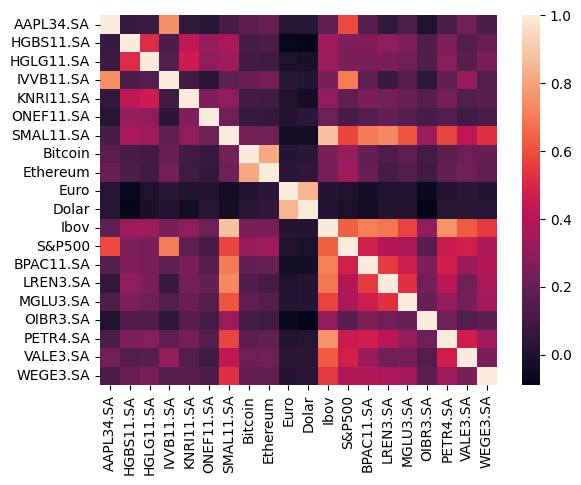

In [38]:
sns.heatmap(correlacao);

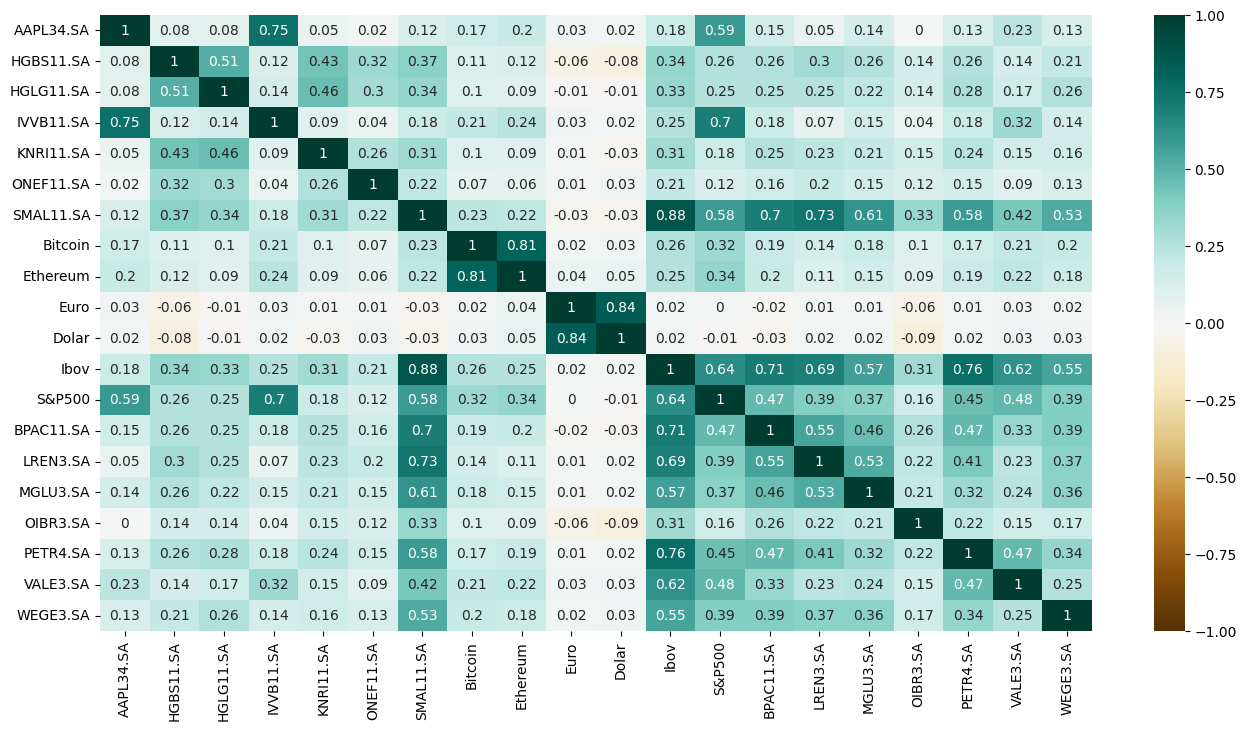

In [48]:
# Deixando o gráfico mais bonito e legível

plt.figure(figsize = (16,8))

sns.heatmap(correlacao.round(decimals= 2),
            vmin = -1, vmax = 1, annot = True, cmap = 'BrBG');

# 3. Estudo de caso: comparação de carteira com o IBOV

In [108]:
import pandas as pd
import yfinance as yf

In [109]:
ativos = ['RENT3', 'PETR4','VALE3', 'ABEV3', 'WEGE3', 'EMBR3', 'RADL3', 'CVCB3', 'CIEL3', 'OIBR3', 'KNRI11']

In [110]:
ativos = [i + '.SA' for i in ativos]

In [111]:
df = yf.download(ativos, start = '2021-01-01')['Adj Close']

[*********************100%%**********************]  11 of 11 completed


In [112]:
df.head()

,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,RENT3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,
2021-01-04,14.085717,3.349763,20.170000,8.37,141.083893,23.500000,11.049582,23.392679,64.441093,67.380280,35.731392
2021-01-05,14.385996,3.272461,20.230000,8.57,140.319962,24.799999,11.481478,23.327263,64.060791,68.514816,37.924492
2021-01-06,14.677172,3.195158,20.379999,8.90,140.372635,24.400000,11.504409,22.785200,60.371918,70.761803,38.930061
2021-01-07,14.604377,3.220926,19.559999,8.88,140.451660,24.600000,11.848393,22.495481,63.233650,75.381035,40.538990
2021-01-08,15.041145,3.289639,19.510000,8.81,140.100433,24.299999,11.894258,23.149689,67.502464,75.145287,42.990669


* Vamos supor que compramos R$1000 de cada papel

In [113]:
primeiro = df.iloc[0]

In [114]:
num_papeis = 1000/primeiro

In [115]:
comprados = round(num_papeis, 0)
comprados

ABEV3.SA      71.0
CIEL3.SA     299.0
CVCB3.SA      50.0
EMBR3.SA     119.0
KNRI11.SA      7.0
OIBR3.SA      43.0
PETR4.SA      91.0
RADL3.SA      43.0
RENT3.SA      16.0
VALE3.SA      15.0
WEGE3.SA      28.0
Name: 2021-01-04 00:00:00, dtype: float64

In [116]:
pl = comprados*df
pl.head()

,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,RENT3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,
2021-01-04,1000.085921,1001.579041,1008.500004,996.029986,987.587250,1010.500000,1005.512006,1005.885206,1031.057495,1010.704193,1000.478973
2021-01-05,1021.405706,978.465749,1011.499977,1019.829964,982.239731,1066.399967,1044.814474,1003.072304,1024.972656,1027.722244,1061.885773
2021-01-06,1042.079191,955.352243,1018.999958,1059.099955,982.608444,1049.199984,1046.901204,979.763605,965.950684,1061.427040,1090.041718
2021-01-07,1036.910752,963.056817,977.999973,1056.720014,983.161621,1057.800016,1078.203803,967.305704,1011.738403,1130.715523,1135.091721
2021-01-08,1067.921318,983.601917,975.500011,1048.390050,980.703033,1044.899967,1082.377523,995.436615,1080.039429,1127.179298,1203.738739


In [117]:
pl.tail()

,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,RENT3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,
2023-10-31,913.059976,1052.479994,137.500000,2093.210018,1110.759949,25.369999,3161.340153,1109.399967,813.919983,1035.000000,924.279953
2023-11-01,922.289984,1070.419977,149.500000,2136.050091,1103.410034,26.230001,3195.919903,1067.689997,830.719971,1054.799995,926.240051
2023-11-03,943.589997,1082.379966,162.500000,2220.539982,1116.709991,27.519999,3234.140083,1090.910036,876.960022,1067.999954,938.839966
2023-11-06,959.210016,1091.350029,147.500002,2215.780100,1121.049957,26.230001,3231.409847,1099.939997,864.159973,1072.500000,929.879974
2023-11-07,960.629981,1124.239997,150.999999,2175.320082,1135.259949,27.519999,3178.630028,1111.980026,883.039978,1050.000000,918.680038


In [118]:
pl['PL Total'] = pl.sum(axis = 1)

In [119]:
pl.head()

,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,RENT3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,
2021-01-04,1000.085921,1001.579041,1008.500004,996.029986,987.587250,1010.500000,1005.512006,1005.885206,1031.057495,1010.704193,1000.478973,11057.920076
2021-01-05,1021.405706,978.465749,1011.499977,1019.829964,982.239731,1066.399967,1044.814474,1003.072304,1024.972656,1027.722244,1061.885773,11242.308545
2021-01-06,1042.079191,955.352243,1018.999958,1059.099955,982.608444,1049.199984,1046.901204,979.763605,965.950684,1061.427040,1090.041718,11251.424026
2021-01-07,1036.910752,963.056817,977.999973,1056.720014,983.161621,1057.800016,1078.203803,967.305704,1011.738403,1130.715523,1135.091721,11398.704347
2021-01-08,1067.921318,983.601917,975.500011,1048.390050,980.703033,1044.899967,1082.377523,995.436615,1080.039429,1127.179298,1203.738739,11589.787902


In [120]:
pl.tail()

,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,RENT3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,
2023-10-31,913.059976,1052.479994,137.500000,2093.210018,1110.759949,25.369999,3161.340153,1109.399967,813.919983,1035.000000,924.279953,12376.319992
2023-11-01,922.289984,1070.419977,149.500000,2136.050091,1103.410034,26.230001,3195.919903,1067.689997,830.719971,1054.799995,926.240051,12483.270004
2023-11-03,943.589997,1082.379966,162.500000,2220.539982,1116.709991,27.519999,3234.140083,1090.910036,876.960022,1067.999954,938.839966,12762.089997
2023-11-06,959.210016,1091.350029,147.500002,2215.780100,1121.049957,26.230001,3231.409847,1099.939997,864.159973,1072.500000,929.879974,12759.009896
2023-11-07,960.629981,1124.239997,150.999999,2175.320082,1135.259949,27.519999,3178.630028,1111.980026,883.039978,1050.000000,918.680038,12716.300078


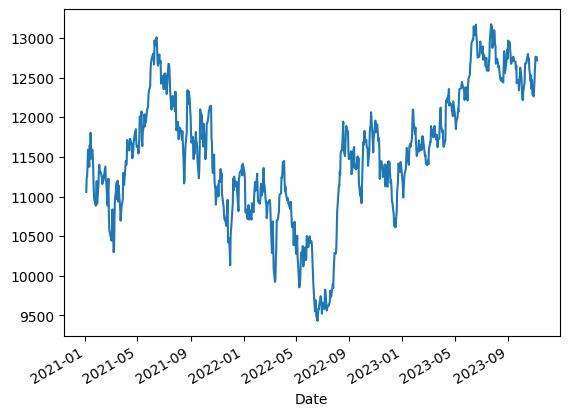

In [121]:
pl['PL Total'].plot();

* Pegando o IBOV

In [122]:
ibov = yf.download('^BVSP', start = '2021-01-01')

[*********************100%%**********************]  1 of 1 completed


In [123]:
ibov.rename(columns = {'Close':'IBOV'}, inplace = True)

In [124]:
ibov = ibov[['IBOV']]

In [125]:
ibov

,IBOV
Date,
2021-01-04,118558.000000
2021-01-05,119223.000000
2021-01-06,119851.000000
2021-01-07,121956.000000
2021-01-08,125077.000000
...,...
2023-10-31,113144.000000
2023-11-01,115053.000000
2023-11-03,118160.000000


In [126]:
novo_df = pd.merge(ibov, pl, how = 'inner', on = 'Date')

In [127]:
novo_df.head()

,IBOV,ABEV3.SA,CIEL3.SA,CVCB3.SA,EMBR3.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,RENT3.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,,
2021-01-04,118558.0,1000.085921,1001.579041,1008.500004,996.029986,987.587250,1010.500000,1005.512006,1005.885206,1031.057495,1010.704193,1000.478973,11057.920076
2021-01-05,119223.0,1021.405706,978.465749,1011.499977,1019.829964,982.239731,1066.399967,1044.814474,1003.072304,1024.972656,1027.722244,1061.885773,11242.308545
2021-01-06,119851.0,1042.079191,955.352243,1018.999958,1059.099955,982.608444,1049.199984,1046.901204,979.763605,965.950684,1061.427040,1090.041718,11251.424026
2021-01-07,121956.0,1036.910752,963.056817,977.999973,1056.720014,983.161621,1057.800016,1078.203803,967.305704,1011.738403,1130.715523,1135.091721,11398.704347
2021-01-08,125077.0,1067.921318,983.601917,975.500011,1048.390050,980.703033,1044.899967,1082.377523,995.436615,1080.039429,1127.179298,1203.738739,11589.787902


* Normalizar


In [128]:
normalizado = (novo_df/novo_df.iloc[0])*100

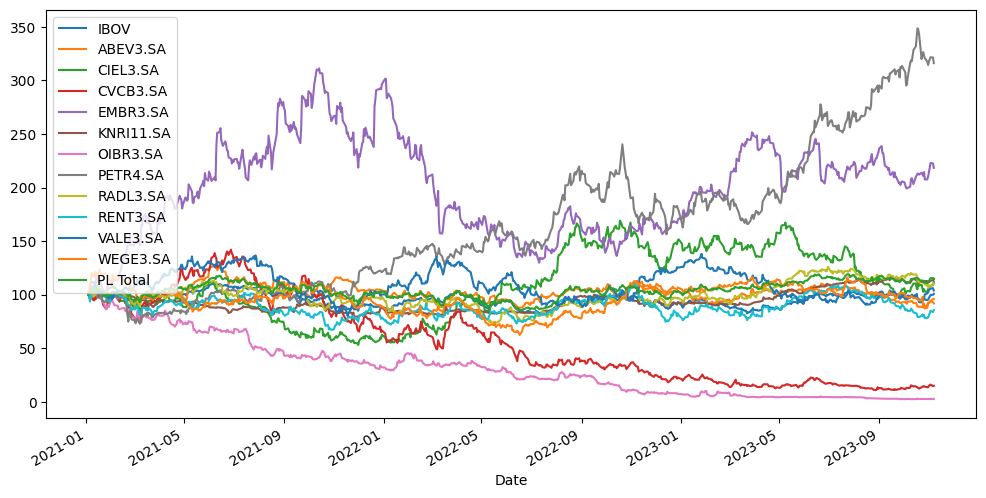

In [129]:
# Plot dos ativos, carteira (PL) e IBOV

normalizado.plot(figsize= (12,6));

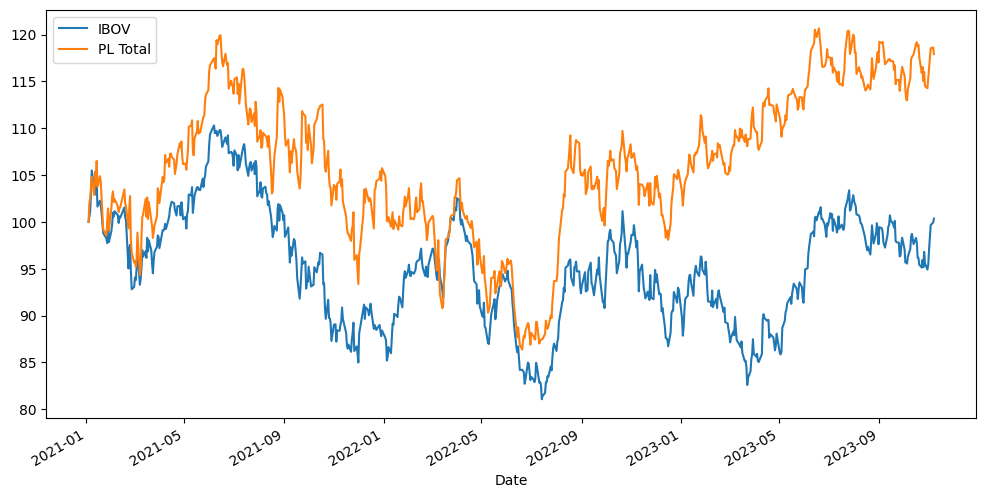

In [107]:
# Plot somente IBOV e carteira (PL)

normalizado[['IBOV', 'PL Total']].plot(figsize = (12,6));